# Knihovny

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import seaborn
import numpy as np
import os

# Načtení dat

In [3]:
df_1 = pd.read_excel(r"C:\Users\Tomáš Smažík\Desktop\Data\data\schiller.xlsx", sheet_name=0)
df_2 = pd.read_excel(r"C:\Users\Tomáš Smažík\Desktop\Data\data\schiller.xlsx", sheet_name=1)

# Převedení čtvrtletních dat na roční

In [4]:
df_2['Year'] = df_2['Date'].astype(int)
df_2 = df_2.groupby('Year', as_index=False)['Index'].mean()

# Spojení do jedné tabulky

In [5]:
df_merge = pd.merge(df_1, df_2, on='Year', how='inner')

# Zohlednění inflace do výpočtu Real Home Price Index

In [6]:
base_nominal = df_merge['Index'].iloc[0]
base_cpi = df_merge['CPI'].iloc[0]

df_merge['Real_Index'] = 100 * (df_merge['Index'] / df_merge['CPI']) / (base_nominal / base_cpi)

# Formátování

In [7]:
tabulka_1 = df_merge.drop(columns=["CPI", "Index"])

In [8]:
tabulka_1.rename(columns={'Real_Index': 'Real Home Price Index'}, inplace=True)
cols = ['Year', 'Real Home Price Index'] + [col for col in tabulka_1.columns if col not in ['Year', 'Real Home Price Index']]
tabulka_1 = tabulka_1[cols]

In [9]:
tabulka_1.set_index(["Year"])

,Real Home Price Index,Real Building Cost Index,U.S. Population Millions,Long Rate
Year,,,,
1890,100.000000,51.362340,63.056,3.42
1891,88.011791,47.266163,64.361,3.62
1892,95.421736,52.048155,65.666,3.60
1893,92.297385,44.673332,66.970,3.75
1894,123.980483,57.263434,68.275,3.70
...,...,...,...,...
2020,184.243880,91.086219,330.152,1.76
2021,212.719978,100.565793,332.351,1.08
2022,227.182115,106.174478,333.595,1.76


# Graf

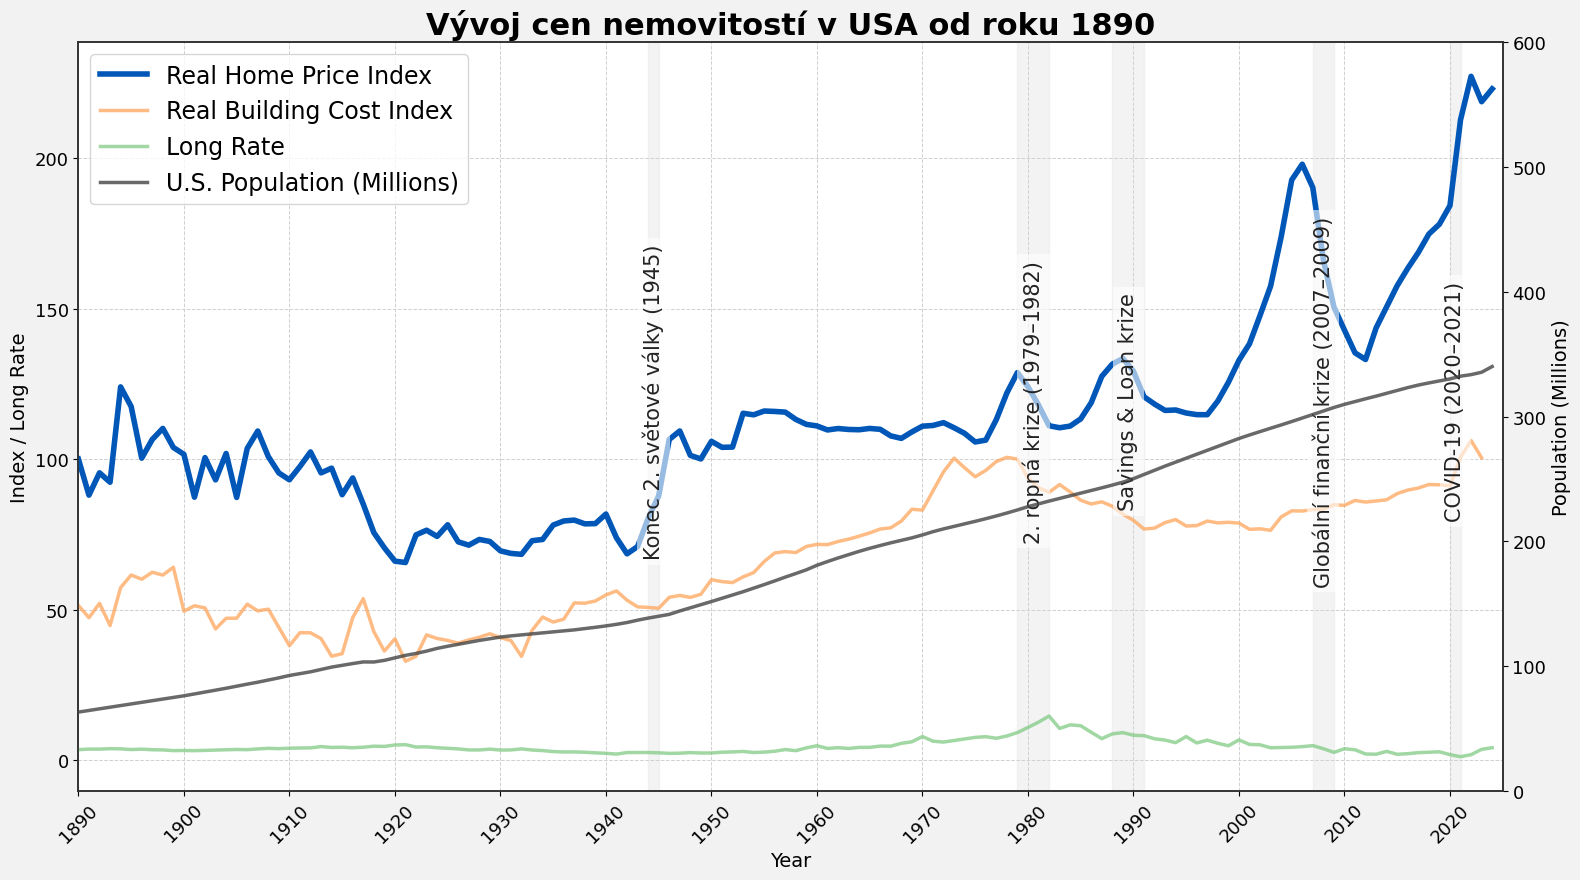

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

# -------------------------------------------------------
# Custom profesionální styl
# -------------------------------------------------------
plt.rcParams.update({
    "axes.facecolor": "white",
    "figure.facecolor": "#f2f2f2",
    "axes.edgecolor": "#333333",
    "axes.linewidth": 1.2,
    "grid.color": "#d0d0d0",
    "grid.linewidth": 0.7,
    "grid.linestyle": "--",
    "font.size": 13
})

fig, ax1 = plt.subplots(figsize=(16, 9))

# Barvy
color_main = "#0057b7"
colors_subtle = ["#ff9f50", "#7ac77d"]
color_population = "#444444"

# -------------------------------------------------------
# Levá osa — hlavní + doprovodné křivky
# -------------------------------------------------------
ax1.plot(
    tabulka_1["Year"],
    tabulka_1["Real Home Price Index"],
    color=color_main,
    linewidth=4,
    label="Real Home Price Index",
    zorder=5
)

ax1.plot(
    tabulka_1["Year"],
    tabulka_1["Real Building Cost Index"],
    color=colors_subtle[0],
    linewidth=2.5,
    alpha=0.7,
    label="Real Building Cost Index",
    zorder=5
)

ax1.plot(
    tabulka_1["Year"],
    tabulka_1["Long Rate"],
    color=colors_subtle[1],
    linewidth=2.5,
    alpha=0.7,
    label="Long Rate",
    zorder=5
)

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Index / Long Rate", fontsize=14)

ax1.grid(True)

# -------------------------------------------------------
# Pravá osa — population curve BEZ vodicích čar
# -------------------------------------------------------
ax2 = ax1.twinx()
ax2.grid(False)

ax2.plot(
    tabulka_1["Year"],
    tabulka_1["U.S. Population Millions"],
    color=color_population,
    linewidth=2.5,
    linestyle="-",
    alpha=0.8,
    label="U.S. Population (Millions)",
    zorder=5
)

ax2.set_ylabel("Population (Millions)", fontsize=14)
ax2.set_ylim(0, 600)

# -------------------------------------------------------
# Šedé pásy + VERTIKÁLNÍ text PŘED GRAFEM
# -------------------------------------------------------
def shade_period(start, end, text):
    ax1.axvspan(start, end, color="#e6e6e6", alpha=0.45, zorder=1)
    ax1.text(
        (start + end) / 2,
        ax1.get_ylim()[1] * 0.50,
        text,
        fontsize=15,
        ha="center",
        va="center",
        color="#222222",
        rotation=90,
        bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"),
        zorder=9     # <<< popisek NAD grafem
    )

shade_period(1944, 1945, "Konec 2. světové války (1945)")
shade_period(1979, 1982, "2. ropná krize (1979–1982)")
shade_period(1988, 1991, "Savings & Loan krize")
shade_period(2007, 2009, "Globální finanční krize (2007–2009)")
shade_period(2020, 2021, "COVID-19 (2020–2021)")

# -------------------------------------------------------
# Osa X — natvrdo 1890 až 2025
# -------------------------------------------------------
years = np.arange(1890, 2026, 10)

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)
ax1.set_xlim(1890, 2025)

# -------------------------------------------------------
# Legenda — VĚTŠÍ PÍSMO
# -------------------------------------------------------
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc="upper left",
    frameon=True,
    facecolor="white",
    fontsize=17    # <<< větší písmo
)

# -------------------------------------------------------
# Titulek
# -------------------------------------------------------
plt.title("Vývoj cen nemovitostí v USA od roku 1890", fontsize=22, weight="bold")
plt.tight_layout()

# -------------------------------------------------------
# Uložení
# -------------------------------------------------------
output_path = r"C:\\Users\\Tomáš Smažík\\Desktop\\Data\\výsledky\\graf.png"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
plt.savefig(output_path, dpi=300)